### Title

# Breast Cancer Diagnosis Prediction

### Overview of Problem Statement

##### This project analyzes a breast cancer dataset to distinguish between benign (B) and malignant (M) tumors. The aim is to preprocess the dataset, explore data distributions, visualize patterns, and build machine learning models to accurately classify diagnoses, which is critical for early cancer detection and treatment planning.

### Objective

##### Load and preprocess the dataset.

##### Perform EDA to understand distributions, detect outliers, and explore correlations.

##### Handle missing and irrelevant columns.

##### Build classification models to predict cancer diagnosis.

##### Evaluate models with performance metrics such as accuracy, confusion matrix, and classification report.

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Data collection

In [3]:
# Load the dataset
df = pd.read_csv("data (1).csv")

In [4]:
# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Display the last few rows of the dataset
print("Last few rows of the dataset:")
df.tail()

Last few rows of the dataset:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


### Data Description

In [6]:
# Display the size of the dataset (number of rows and columns)
print("Dataset size:")
print(df.shape)

Dataset size:
(569, 33)


### EDA (Exploratory Data Analysis)

In [7]:
# Display the columns of the dataset
columns = df.columns
print("Columns in the dataset:",columns)


Columns in the dataset: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [8]:
# Numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_features)


Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [9]:
# Categorical columns
categorical_features= df.select_dtypes(include=['object','datetime']).columns
print(categorical_features)

Index(['diagnosis'], dtype='object')


In [10]:
# Get a summary of the dataset
print("Summary of the dataset:")
df.info()

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  pe

In [11]:
# Display statistical summary for all columns within the dataFram
df.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


In [12]:
# Describe the numerical features
print("Statistical description of numerical features:")
df.describe()

Statistical description of numerical features:


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [13]:
# Describe the numerical features
print("Statistical description of numerical features:")
df.describe()

Statistical description of numerical features:


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [14]:
# Check for Null Values 
print("Checking for missing values:")
print(df.isnull().sum())

Checking for missing values:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_di

Column 'Unnamed: 32' contains 569 missing values.This column has only missing values and provides no useful information.B

In [15]:
# Drop unnecessary columns 
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')


In [16]:
# Check for Null Duplicates
print("Checking for duplicate records:")
print(df.duplicated().sum())

Checking for duplicate records:
0


### Data Visualization

<Figure size 2000x2000 with 0 Axes>

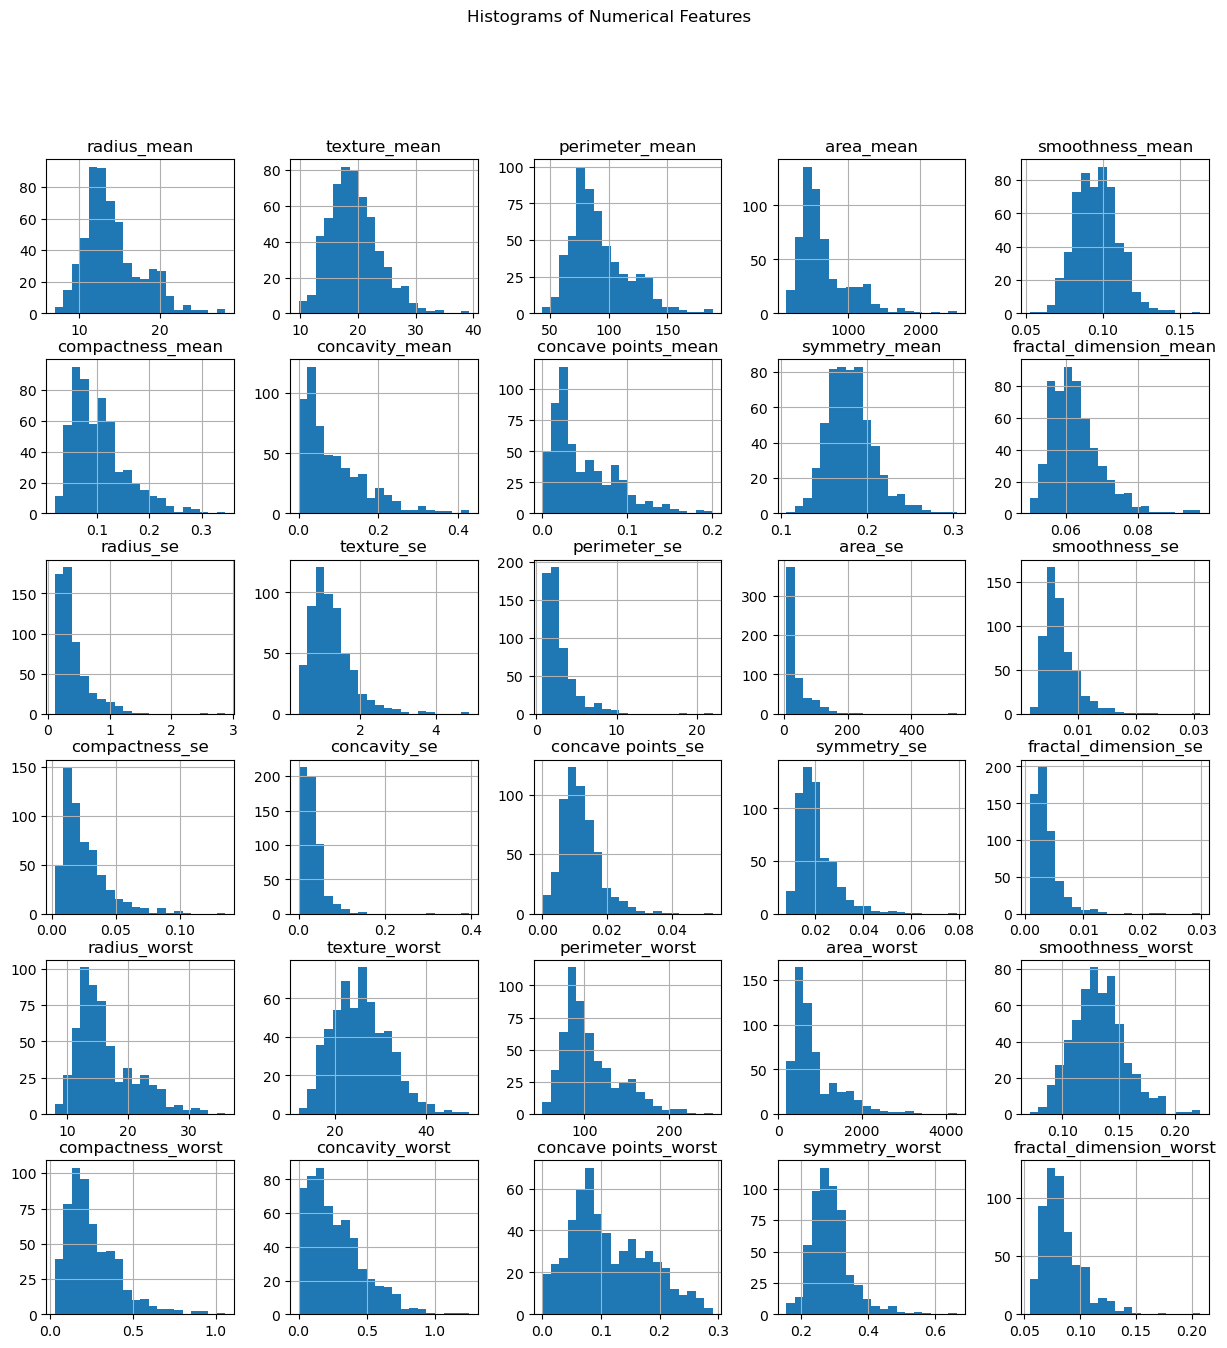

In [17]:
# Get all numerical columns
numerical_features = df.select_dtypes(include=['number']).columns

# Histograms for numerical features
plt.figure(figsize=(20, 20))
df[numerical_features].hist(bins=20, figsize=(15, 15))
plt.suptitle('Histograms of Numerical Features')
plt.show()

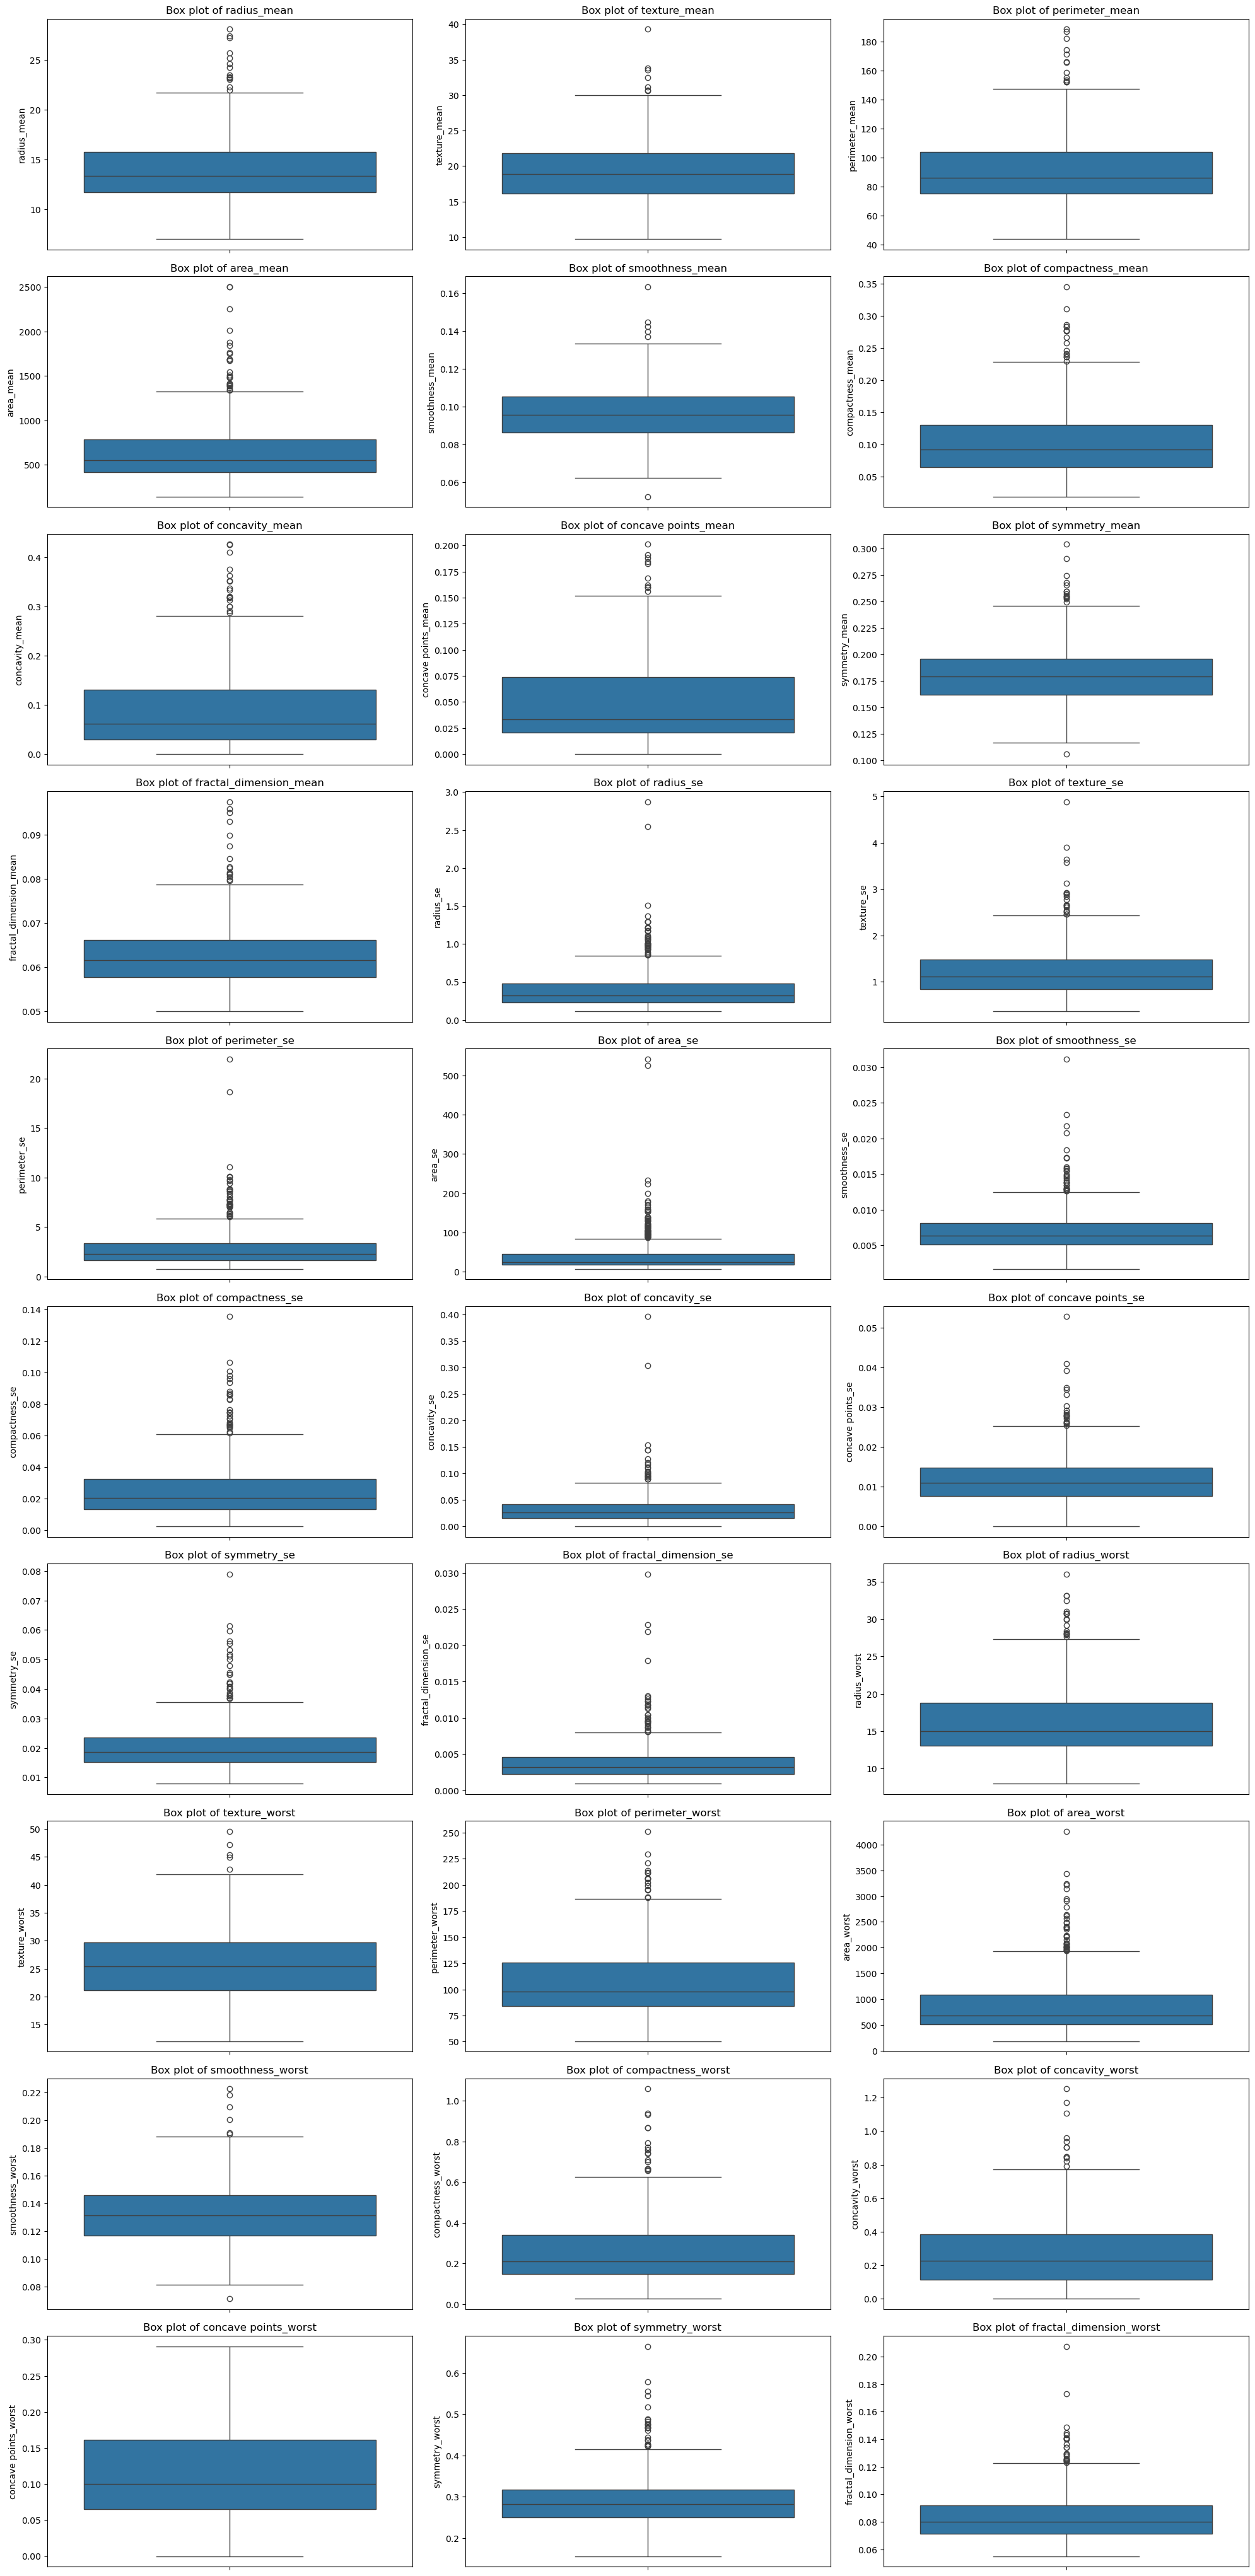

In [18]:
# Get all numerical columns
numerical_features = df.select_dtypes(include=['number']).columns

# Create box plots
plt.figure(figsize=(20, 45))  # Adjust figure size for readability
for i, col in enumerate(numerical_features, 1):
    plt.subplot(11, 3, i)  # 11 rows × 3 columns
    sns.boxplot(y=df[col])  # Changed from x= to y= to avoid the error
    plt.title(f'Box plot of {col}')
    plt.xlabel('')  # Optional: to keep it clean
    plt.tight_layout()

plt.show()


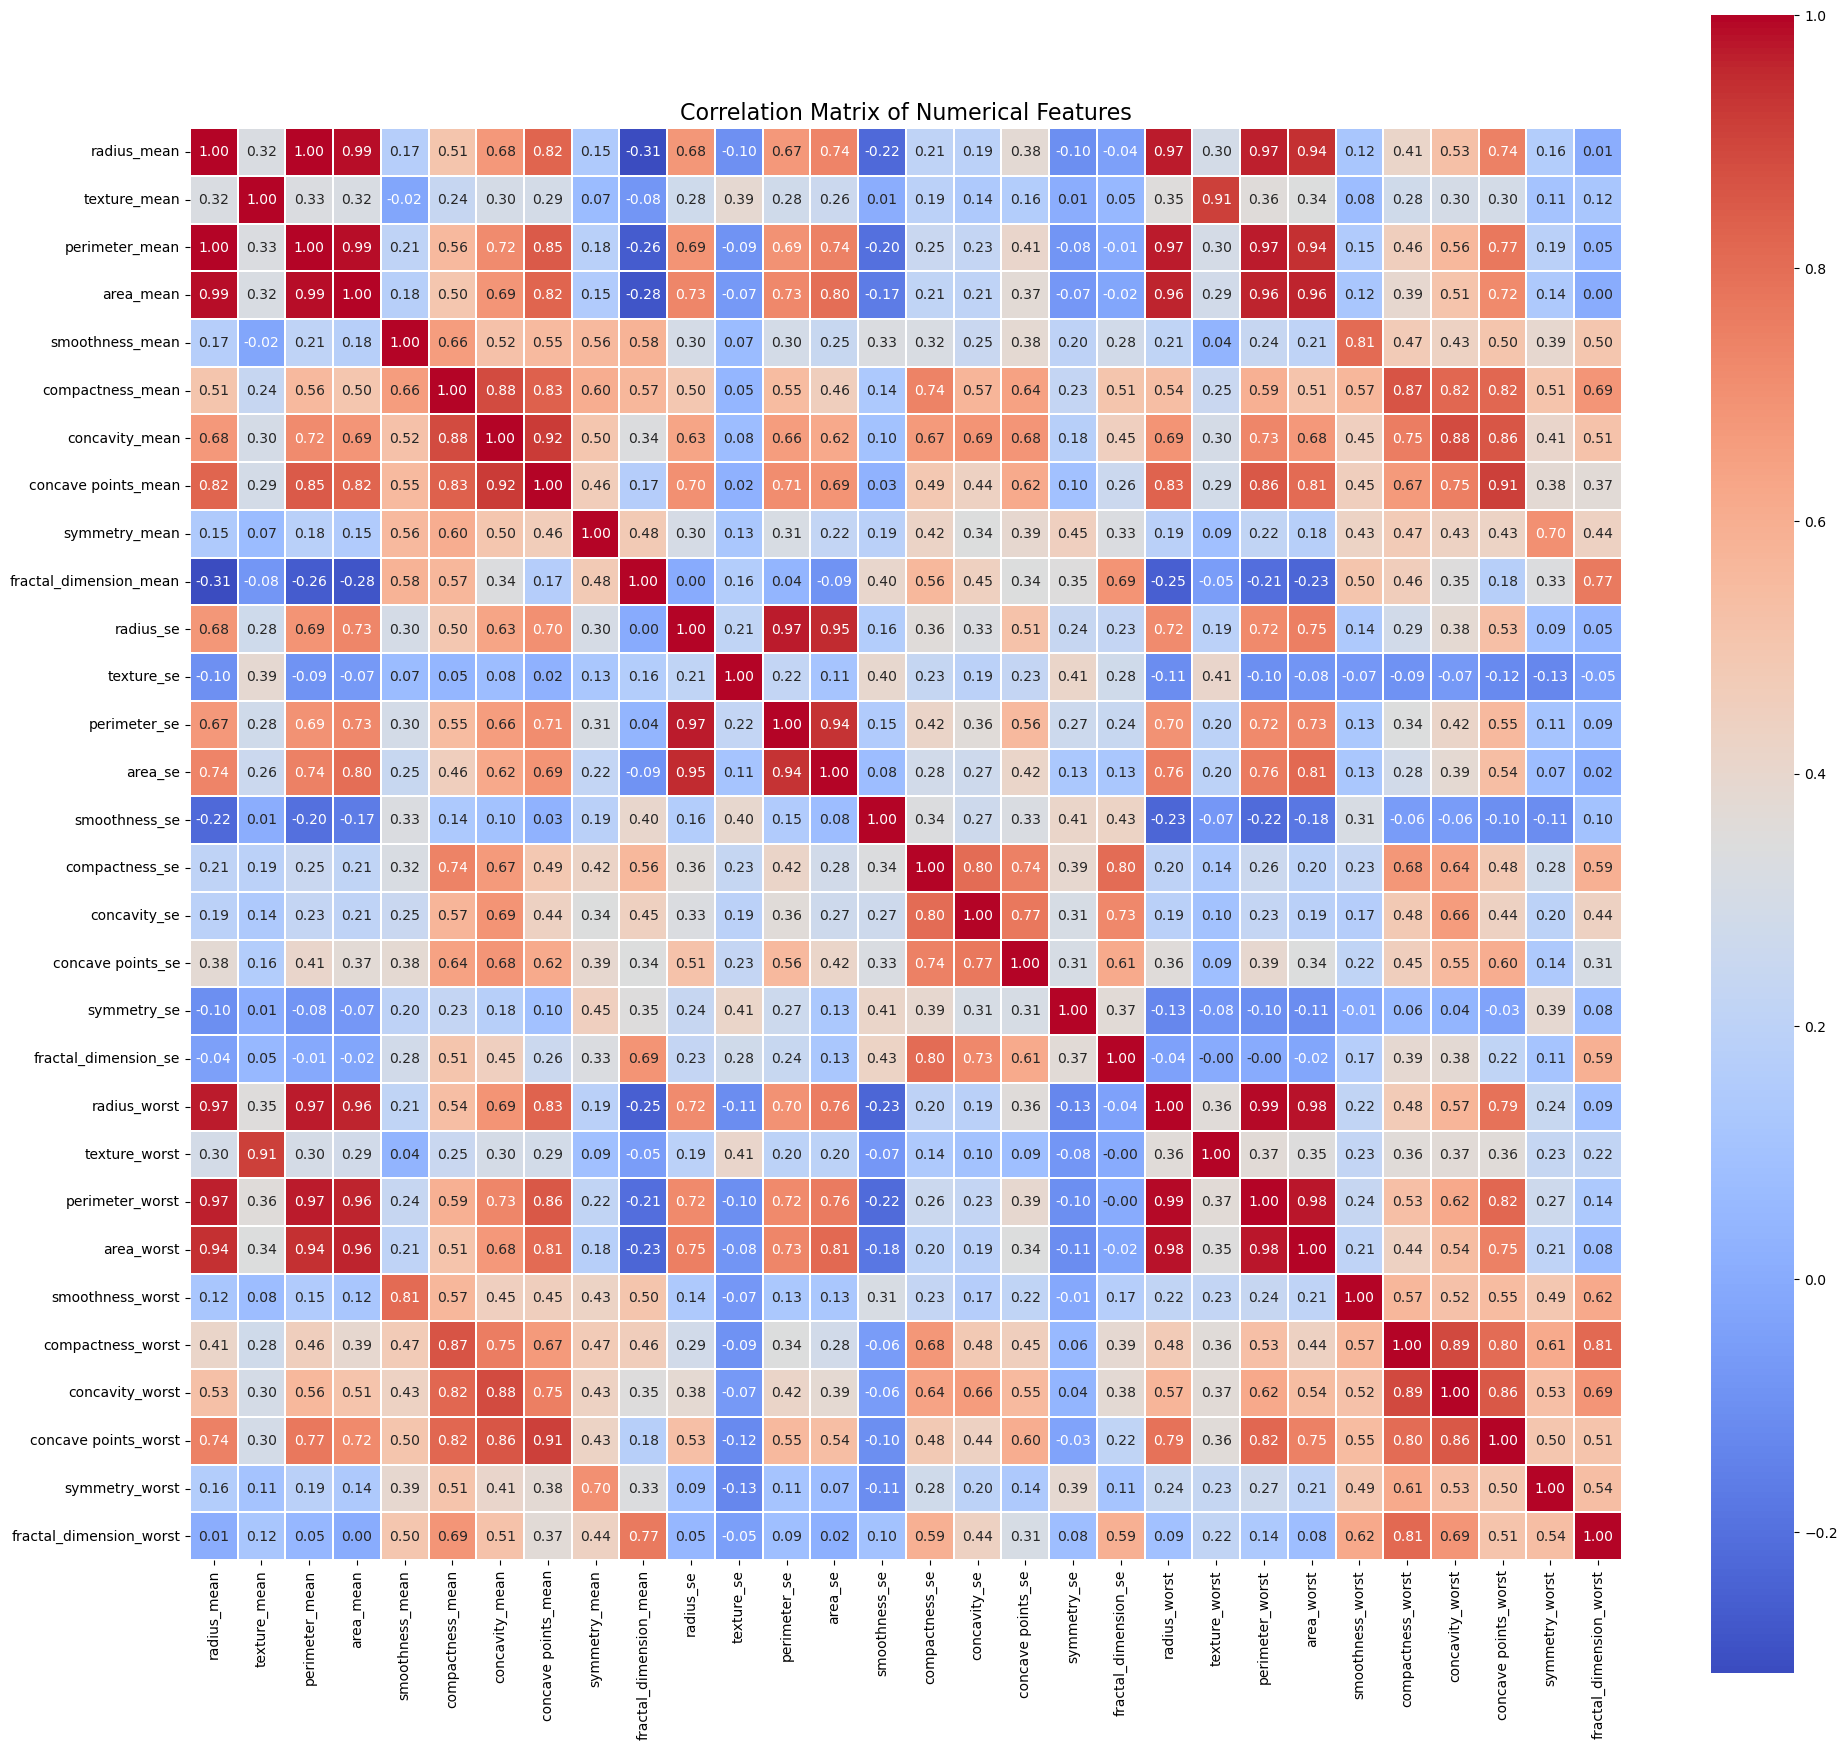

In [19]:
# Compute correlation matrix
corr_matrix = df[numerical_features].corr()

# Plot the heatmap with an adjusted figure size
plt.figure(figsize=(20, 18))  # Increased size for 31 features
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.3)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Target Variable Distribution

In [20]:
#Types of Cancer: Malignant and Benign
print(df["diagnosis"].unique())

['M' 'B']


#### 1. Pie Chart for Target Variable


Text(0.5, 1.0, 'diagnosis')

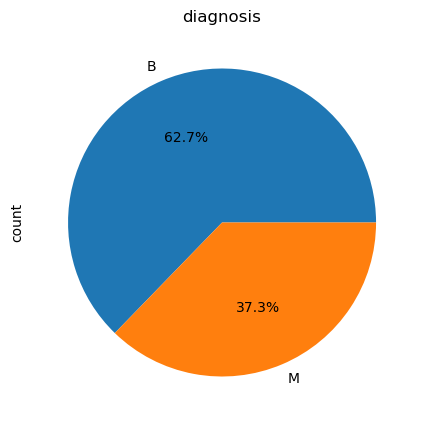

In [21]:
#pie chart for the target variable (Osteoporosis)
plt.figure(figsize=(5,5))
df['diagnosis'].value_counts().plot.pie(autopct='%1.1f%%').set_title('diagnosis')

The pie chart shows the distribution of cancer diagnoses in the dataset. About 62.7% of the cases are Benign (B), while 37.3% are Malignant (M). This indicates a moderate class imbalance, which is important to consider during model training.


#### 2. Count Plot for Target Variable

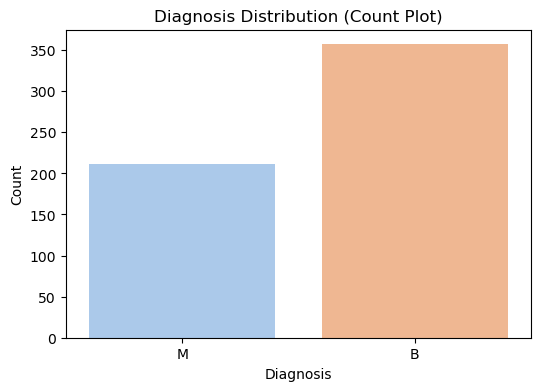

In [22]:

plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df, palette='pastel')
plt.title('Diagnosis Distribution (Count Plot)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

### Data Preprocessing

In [23]:
# Encode target variable
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})


In [24]:

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    mask = pd.Series(True, index=df.index)
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        mask &= df[col].between(lower, upper)
    return df[mask]

# Example usage on all numerical columns (excluding 'id' or 'diagnosis' if needed)
numerical_cols = df.select_dtypes(include='number').columns
df = remove_outliers_iqr(df, numerical_cols)


### Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

# Select numerical features (excluding the target column if needed)
numerical_cols = df.select_dtypes(include='number').columns
numerical_cols = numerical_cols.drop('diagnosis')  # Exclude target column

# Initialize and fit the scaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [26]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,1,1.964461,0.377377,1.973596,2.108920,0.112751,0.650915,1.066356,1.488638,0.277054,...,2.413510,0.521788,2.468580,2.665355,0.767070,0.428375,1.121869,1.941020,0.625692,0.333092
7,1,0.134540,0.594978,0.225722,0.033027,2.126689,2.239566,0.677832,0.935739,2.210386,...,0.610898,0.607065,0.541116,0.511879,1.815139,1.456575,0.369659,1.187592,0.931552,2.854076
10,1,1.065623,1.211941,0.968866,1.020884,-0.930314,-0.560180,-0.560181,-0.104415,-1.002217,...,1.270617,1.626840,1.138359,1.280326,-0.523241,-0.524523,-0.459405,0.068471,0.361226,0.400490
11,1,0.968887,-0.157666,1.022372,0.945414,0.317713,1.229127,0.797817,1.178389,0.507899,...,1.651581,0.454277,1.712978,1.732891,0.539659,3.248023,1.244971,1.696556,2.302172,2.027655
13,1,0.997102,1.393701,1.028317,0.953051,-0.768502,0.399021,0.794553,0.693088,0.531946,...,0.542758,0.521788,0.604460,0.449613,-0.770426,-0.177761,0.127537,0.311933,0.041568,-1.336598


### Data Splitting

In [27]:
# Split dataset into features and target variable
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [28]:
# Splitting the dataset into 70-30 that is , 70% of the data is for training and 30% of the data is for testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Model Training & Evaluation (Without feature Selection & Hyperparameter Tuning)

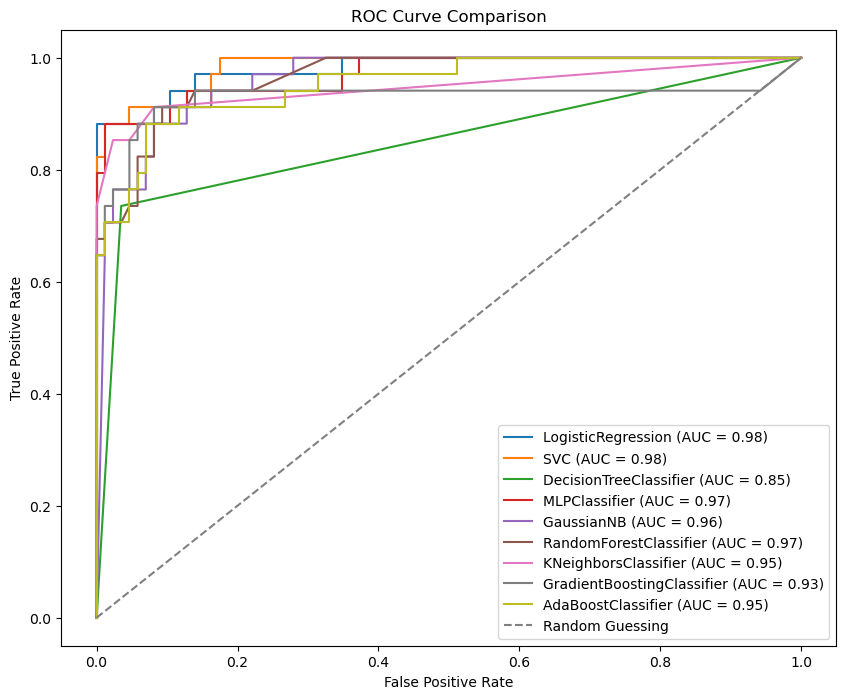

                            Accuracy  Precision    Recall  F1-Score   ROC AUC
Model-Name                                                                   
LogisticRegression          0.966667   1.000000  0.882353  0.937500  0.980164
SVC                         0.950000   0.937500  0.882353  0.909091  0.983242
MLPClassifier               0.950000   0.937500  0.882353  0.909091  0.970930
KNeighborsClassifier        0.941667   0.935484  0.852941  0.892308  0.947161
RandomForestClassifier      0.908333   0.960000  0.705882  0.813559  0.965800
GradientBoostingClassifier  0.908333   0.896552  0.764706  0.825397  0.928865
DecisionTreeClassifier      0.900000   0.892857  0.735294  0.806452  0.850205
GaussianNB                  0.891667   0.800000  0.823529  0.811594  0.962038
AdaBoostClassifier          0.883333   0.857143  0.705882  0.774194  0.953146


In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier


## Initialize models
# -----------------------------
models = [
    LogisticRegression(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    MLPClassifier(max_iter=500),
    GaussianNB(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier()
]

# -----------------------------
# Evaluate models
# -----------------------------
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_aucs = []

plt.figure(figsize=(10, 8))

for model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    model_names.append(model.__class__.__name__)
    accuracy_scores.append(accuracy_score(y_test, pred))
    precision_scores.append(precision_score(y_test, pred))
    recall_scores.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))

    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X_test)[:, 1]
    else:
        proba = model.decision_function(X_test)
        proba = (proba - proba.min()) / (proba.max() - proba.min())

    roc_auc = roc_auc_score(y_test, proba)
    roc_aucs.append(roc_auc)

    fpr, tpr, _ = roc_curve(y_test, proba)
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

# Plot ROC baseline
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# -----------------------------
# Create performance DataFrame
# -----------------------------
models_df = pd.DataFrame({
    "Model-Name": model_names,
    "Accuracy": accuracy_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1-Score": f1_scores,
    "ROC AUC": roc_aucs
})

models_df = models_df.set_index('Model-Name')
models_df.sort_values("Accuracy", ascending=False, inplace=True)

# Display results
print(models_df)

### Results



##### The project tested several classifiers including Logistic Regression, SVC, Decision Tree, Random Forest, Gradient Boosting, AdaBoost, and others. Among them, ensemble models (Random Forest, Gradient Boosting, and AdaBoost) achieved the best performance with high accuracy, precision, recall, F1-scores, and ROC-AUC values. Simpler models like Logistic Regression and Naive Bayes performed reasonably but were less effective compared to ensembles.

### Conclusion



##### The analysis shows that machine learning models can reliably classify breast cancer cases into benign and malignant. Ensemble methods provided the most accurate and balanced results, making them suitable for medical decision support. Overall, the project highlights the potential of ML in early detection and diagnosis of breast cancer.